- Examine MTL responses to DLPFC vs Parietal stimulation
    - Evidence for Parietal theta enhancement and DLPFC gamma/HFA suppression?
    - TEPs from DLPFC/Parietal stimulation observed in MTL subregions (as a function of connectivity)?
    - Correlation between strength of ERP and subsequent HFA suppression?
- Examine how differently targeted parietal sites yield different MTL responses
- Examine differences in MTL subregion responses

In [34]:
import numpy as np
import mne
import pandas as pd
import pylab as plt

# For custom codebase
import sys
sys.path.insert(0, 'C:\\Users\\esolo\\Documents\\Python Scripts\\lib')

# For parallel processing
import multiprocessing as mp
n_cpus = mp.cpu_count()

### Examine subject-level responses to Parietal stim in the MTL/hippocampus

In [35]:
source_data = './multitaper_power/multitaper_power_0.05_0.55_3-8Hz.pkl'

res = pd.read_pickle(source_data)

# Simplest method: apply a T-value threshold (only expect this in the positive direction)
#res = res[res['T']<5]

# Remove saturated electrodes
res = res[res['saturated']==False]

# Remove noisy electrodes
res = res[res['noisy']==False]

# Remove epileptogenic electrodes
res = res[res['Seizure_Exclude']!=1]

# Need to drop some electrodes with NaNs (small amount of source EEG data contaminated with NaNs)
res_dropna = res.dropna(subset=['T'])

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: T        
No. Observations: 108     Method:             ML       
No. Groups:       16      Scale:              0.6799   
Min. group size:  1       Log-Likelihood:     -143.3175
Max. group size:  24      Converged:          Yes      
Mean group size:  6.8                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.114     0.148  0.769  0.442  -0.177   0.405
g1 Var     0.279     0.207                              



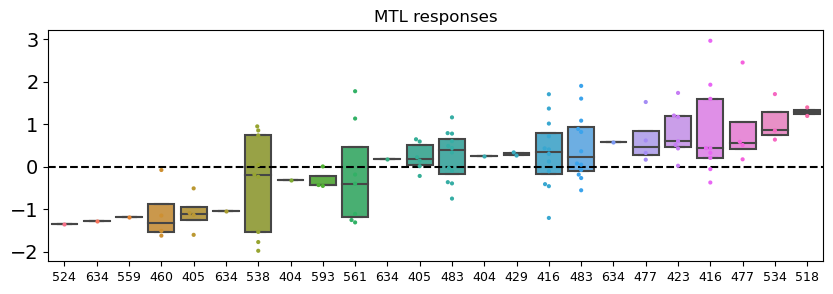

In [36]:
# from utils import swarmplot_subjects
import statsmodels.api as sm
import seaborn as sns
from utils import swarmplot_subjects
%matplotlib inline

# What about MTL electrodes?
from codebase import filter_dict
mtl_data = res_dropna[res_dropna['DKT_label'].str.contains(filter_dict['mtl_filter'])]

vcf = {'g1':'0+C(target)'}
model = sm.MixedLM.from_formula("T ~ 1", data=mtl_data, 
                                vc_formula=vcf,
                                groups='subject')
result = model.fit(reml=False)
print(result.summary())

# Plot results
data_toplot, sub_toplot = swarmplot_subjects(mtl_data, key='T')
plt.figure(figsize=(10, 3)); ax1=plt.subplot(111)
sns.swarmplot(data=data_toplot, size=3,)
sns.boxplot(data=data_toplot, whis=0, showfliers=False)
plt.xticks(np.arange(len(sub_toplot)), sub_toplot, fontsize=9);
plt.hlines([0], xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[1], linestyles='--', color='k')
plt.yticks(fontsize=14);
plt.title('MTL responses');

C:\Users\esolo\anaconda3\envs\mne2\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\esolo\anaconda3\envs\mne2\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\esolo\anaconda3\envs\mne2\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\esolo\anaconda3\envs\mne2\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\esolo\anaconda3\envs\mne2\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:da

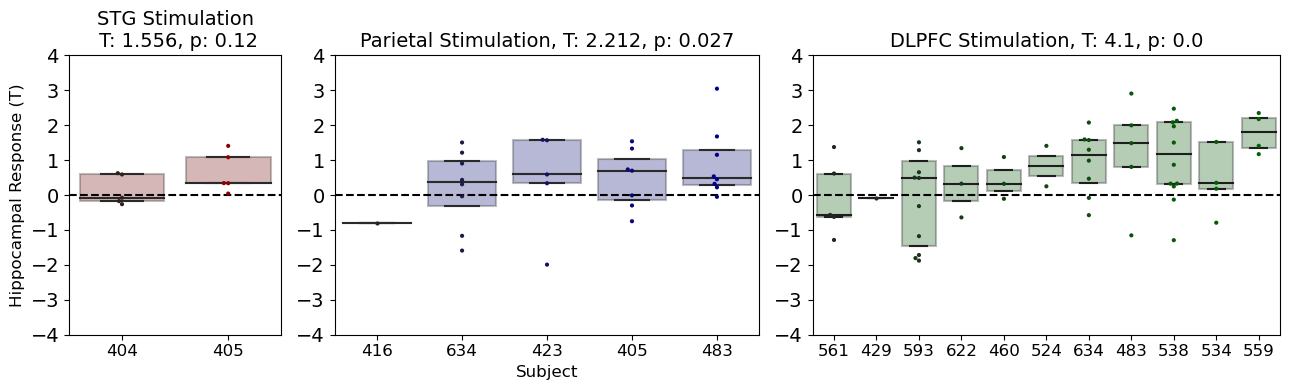

In [98]:
from matplotlib import gridspec
from codebase import filter_dict
%matplotlib inline

sense_region = 'insula' #filter_dict['mtl_filter']
mtl_data = res_dropna[res_dropna['DKT_label'].str.contains(sense_region)]

par_mtl = mtl_data[mtl_data['target'].str.contains('Parietal')]
dlpfc_mtl = mtl_data[mtl_data['target'].str.contains('DLPFC')]
stg_mtl = mtl_data[mtl_data['target'].str.contains('STG')]

res_par = sm.MixedLM.from_formula("T ~ 1", data=par_mtl, vc_formula=vcf, groups='subject').fit(reml=False)
res_dlpfc = sm.MixedLM.from_formula("T ~ 1", data=dlpfc_mtl, vc_formula=vcf, groups='subject').fit(reml=False)
res_stg = sm.MixedLM.from_formula("T ~ 1", data=stg_mtl, vc_formula=vcf, groups='subject').fit(reml=True)

# Plot results
plt.figure(figsize=(13, 4));
gs = gridspec.GridSpec(1, 3, width_ratios = [1, 2, 2.2])

#STG
ax1 = plt.subplot(gs[0])
data_toplot, sub_toplot = swarmplot_subjects(stg_mtl, key='T')
sns.swarmplot(data=data_toplot, size=3, color='darkred')
sns.boxplot(data=data_toplot, whis=0, showfliers=False, color='darkred', boxprops=dict(alpha=.3))
plt.xticks(np.arange(len(sub_toplot)), sub_toplot, fontsize=9);
plt.hlines([0], xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[1], linestyles='--', color='k')
plt.yticks(fontsize=14); plt.ylabel('Hippocampal Response (T)', fontsize=12)
plt.ylim(-4, 4)
plt.title('STG Stimulation\n T: '+str(np.round(res_stg.tvalues[0], 3))+', p: '+str(np.round(res_stg.pvalues[0], 3)), fontsize=14);
plt.xticks(fontsize=12)

#Parietal
ax2 = plt.subplot(gs[1])
data_toplot, sub_toplot = swarmplot_subjects(par_mtl, key='T')
sns.swarmplot(data=data_toplot, size=3, color='darkblue')
sns.boxplot(data=data_toplot, whis=0, showfliers=False, color='darkblue', boxprops=dict(alpha=0.3))
plt.xticks(np.arange(len(sub_toplot)), sub_toplot, fontsize=9);
plt.hlines([0], xmin=ax2.get_xlim()[0], xmax=ax2.get_xlim()[1], linestyles='--', color='k')
plt.yticks(fontsize=14);
plt.ylim(-4, 4)
plt.title('Parietal Stimulation, T: '+str(np.round(res_par.tvalues[0], 3))+', p: '+str(np.round(res_par.pvalues[0], 3)), fontsize=14);
plt.xticks(fontsize=12); plt.xlabel('Subject', fontsize=12)

#DLPFC
ax3 = plt.subplot(gs[2])
data_toplot, sub_toplot = swarmplot_subjects(dlpfc_mtl, key='T')
sns.swarmplot(data=data_toplot, size=3, color='darkgreen')
sns.boxplot(data=data_toplot, whis=0, showfliers=False, color='darkgreen', boxprops=dict(alpha=0.3))
plt.xticks(np.arange(len(sub_toplot)), sub_toplot, fontsize=9);
plt.hlines([0], xmin=ax3.get_xlim()[0], xmax=ax3.get_xlim()[1], linestyles='--', color='k')
plt.yticks(fontsize=14);
plt.ylim(-4, 4)
plt.title('DLPFC Stimulation, T: '+str(np.round(res_dlpfc.tvalues[0], 3))+', p: '+str(np.round(res_dlpfc.pvalues[0], 3)), fontsize=14);
plt.xticks(fontsize=12)
plt.tight_layout()
#plt.savefig('./TMSEEG_plots/LMM_hippocampal_theta_1.1_2.1sec.pdf')

In [63]:
from codebase import subject_tfr

target = 'Parietal'
sense_region = 'anteriorcingulate'
subject = '423'

# Find all the subjects with a given stim/response combination
df = pd.read_pickle(source_data)
df = df[(df['saturated']==False) & (df['noisy']==False) & (df['Seizure_Exclude']!=1)]
df_mtl = df[(df['target'].str.contains(target)) & (df['DKT_label'].str.contains(sense_region))]

# Identify relevant electrodes in sense region
picks = list(df_mtl[df_mtl['subject']==subject]['channel_name'])

# Process powers
mytfr = subject_tfr()
mytfr.load_data_epo(subject, target)
mytfr.set_params(n_cycles=3)
mytfr.n_cpus = 8
mytfr.set_tfr_power(picks=list(np.unique(picks)), mirror_size=225)
mytfr.subtract_baseline(0, 225)

Reading D:\423\complete_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Adding metadata with 11 columns
100 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    0.0s finished


In [64]:
df_mtl[df_mtl['subject']==subject]

,subject,target,MTL,channel_name,T,pval,powers_tms,powers_sham,saturated,noisy,...,mniZ,anatX,anatY,anatZ,DKT_label,Destrieux_label,GM,Seizure_Exclude,Nourski_Assignment,Nourski_Anatomical
1186,423,Parietal,False,LFPx43-LFPx44,1.082148,0.281861,"[-1.3274513351410135, -0.43214837445226983, 0....","[0.2098292468149623, 0.5499164441662119, -0.44...",False,False,...,2.660,-6.07205,22.83826,41.98591,Ctx-lh-caudalanteriorcingulate,Ctx_lh_S_pericallosal,1,0.0,NaN,Middle-anterior cingulate g.
1187,423,Parietal,False,LFPx44-LFPx45,1.295364,0.198648,"[-0.7759072997387162, 0.4451884772710968, -0.3...","[-0.45858408173648124, 0.16987879426849783, 0....",False,False,...,1.445,-16.81785,22.61966,40.44326,Ctx-lh-caudalanteriorcingulate,Ctx_lh_G_and_S_cingul-Mid-Ant,0,0.0,NaN,WM


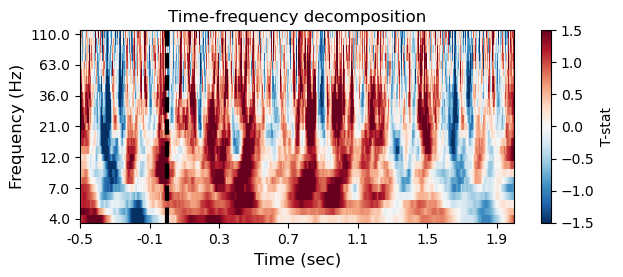

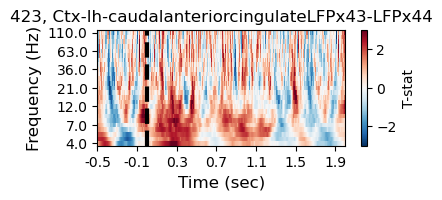

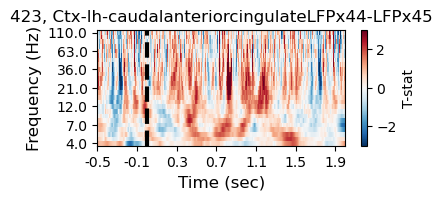

In [65]:
from scipy.stats import ttest_ind
%matplotlib inline

t = ttest_ind(mytfr.tfr_tms, mytfr.tfr_sham, axis=0, equal_var=False)[0]
t_mu = np.mean(t, axis=0)

#Plot the average MTL response across all MTL electrodes
plt.figure(figsize=(7, 2.5))
ax = plt.subplot(111)

plt.matshow(t_mu, fignum=0, aspect='auto', cmap='RdBu_r', vmin=-1.5, vmax=1.5)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]))
plt.xticks(ax.get_xticks(), np.round((ax.get_xticks()/mytfr.fs)-0.5, 3)); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=3)
plt.title('Time-frequency decomposition', fontsize=12); plt.xlabel('Time (sec)', fontsize=12); plt.ylabel('Frequency (Hz)', fontsize=12)
cbar = plt.colorbar(); cbar.set_label('T-stat')

#Plot individual response spectrograms
for e in range(t.shape[0]):
    t_plt = t[e, :, :]
    
    plt.figure(figsize=(4, 1.5))
    ax = plt.subplot(111)

    plt.matshow(t_plt, fignum=0, aspect='auto', cmap='RdBu_r', vmin=-3, vmax=3)
    plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
    plt.xticks(ax.get_xticks(), np.round((ax.get_xticks()/mytfr.fs)-0.5, 3), fontsize=10); ax.xaxis.set_ticks_position('bottom')
    ax.invert_yaxis()
    plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=3)
    plt.title(subject+', '+df_mtl[df_mtl['subject']==subject].iloc[e]['DKT_label']+df_mtl[df_mtl['subject']==subject].iloc[e]['Channel'], fontsize=12); 
    plt.xlabel('Time (sec)', fontsize=12); plt.ylabel('Frequency (Hz)', fontsize=12)
    cbar = plt.colorbar(); cbar.set_label('T-stat')
    
#     if df_mtl[df_mtl['subject']==subject].iloc[e]['Channel']=='LFPx75-LFPx76':
#         plt.savefig('./multitaper_epo_plots/sub405_elec75-76_TFR.pdf')
    

### Plot ERP response

In [66]:
# Computes ERPs for all channels
mytfr.compute_ERP()

C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:410: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  tms_dat = filter_data(self.epochs['tms'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)
C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:411: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  sham_dat = filter_data(self.epochs['sham'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)


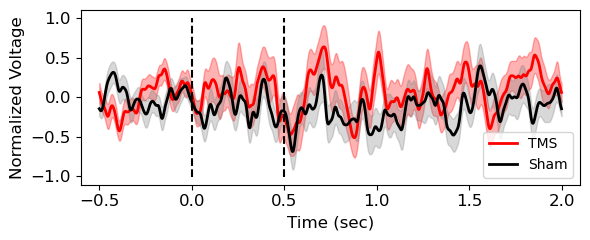

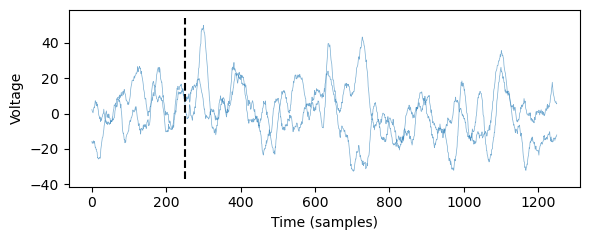

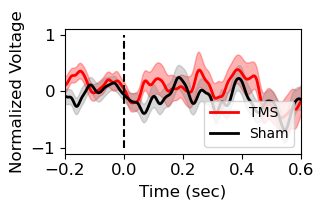

In [79]:
%matplotlib inline

channel_name = 'LFPx44-LFPx45'
sep_tms_mu, sep_tms_sem, sep_sham_mu, sep_sham_sem = mytfr.plot_ERP(channel_name)

# Plot results
plt.figure(figsize=(6, 2.5)); ax=plt.subplot(111)
X = (np.arange(sep_tms_mu.size)/mytfr.fs)-0.5
plt.fill_between(x = X, y1=sep_tms_mu-sep_tms_sem, 
                 y2 = sep_tms_mu+sep_tms_sem, color='red', alpha=0.3)  #plot the error bars
plt.fill_between(x = X, y1=sep_sham_mu-sep_sham_sem, 
                 y2 = sep_sham_mu+sep_sham_sem, color='gray', alpha=0.3)
plt.plot(X, sep_tms_mu, color='r', linewidth=2, label='TMS');
plt.plot(X, sep_sham_mu, color='k', linewidth=2, label='Sham');
plt.vlines([0.0, 0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xlim(-0.6,2.1); 
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Normalized Voltage', fontsize=12);
plt.xlabel('Time (sec)', fontsize=12)
plt.legend(loc=4)
#plt.title('Stimulation-evoked potentials\n'+elecs.iloc[e]['DKT_label']+', channel '+str(elecs['Channel'].iloc[e]), fontsize=14);
plt.tight_layout()

# Plot example raw EEG
plt.figure(figsize=(6, 2.5)); ax=plt.subplot(111)
channel_idx = np.where(np.array(mytfr.epochs.ch_names)==channel_name)[0][0]
plt.plot(mytfr.epochs['tms'].get_data()[np.random.randint(0, 50, size=2), channel_idx, :].T, alpha=0.6, linewidth=0.5, color='C0')
plt.vlines([250], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.ylabel('Voltage'); plt.xlabel('Time (samples)')
plt.tight_layout()

# Focus on the ERP interval
plt.figure(figsize=(3.5, 2)); ax=plt.subplot(111)
X = (np.arange(sep_tms_mu.size)/mytfr.fs)-0.5
plt.fill_between(x = X, y1=sep_tms_mu-sep_tms_sem, 
                 y2 = sep_tms_mu+sep_tms_sem, color='red', alpha=0.3)  #plot the error bars
plt.fill_between(x = X, y1=sep_sham_mu-sep_sham_sem, 
                 y2 = sep_sham_mu+sep_sham_sem, color='gray', alpha=0.3)
plt.plot(X, sep_tms_mu, color='r', linewidth=2, label='TMS');
plt.plot(X, sep_sham_mu, color='k', linewidth=2, label='Sham');
plt.vlines([0.0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xlim(-0.2,0.6); 
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Normalized Voltage', fontsize=12);
plt.xlabel('Time (sec)', fontsize=12)
plt.legend(loc=4)
#plt.savefig('./multitaper_epo_plots/sub405_75-76_ERP.pdf')
#plt.title('Stimulation-evoked potentials', fontsize=14);
plt.tight_layout()

 - Subject 593, channel 232-233 has an amazing hippocampal ERP vs. sham and strong HFA suppression
- Subject 593 has amazing R amygdala responses (ERP and HFA suppression) but less so on the left. 
- Subject 559, channel 113-114, has strong TMS *and* sham ERPs. Note that this subject did have cutaneous sham (and also required manual fixes to the original data file due to errors in how this data was logged on the spreadsheet).
- Subject 483, channel 157-158, has a nice hippocampal ERP vs. sham w/ HFA suppression. As does 153-154 and 144-145. 
- Subject 477, channel 113-114 has a nice hippocampal ERP but not much HFA suppression. 
- Subject 518 has some interesting amygdala responses, too.
- Subject 405 has nicely dissociated responses between Amygdala and Hippocampus in Parietal stim

### Generate grand-average TFR spectrogram for clustering analysis

In [117]:
from codebase import subject_tfr, filter_dict
from scipy.stats import ttest_ind

# Set some params
n_cycles_ = 3
mirror_size_ = 225

# Find all the subjects with a given stim/response combination
df = pd.read_pickle(source_data)  # does not really matter which file we use here
df = df[(df['saturated']==False) & (df['noisy']==False) & (df['Seizure_Exclude']!=1)]

# Filter only for the desired target/response region pair
recording_area = 'anteriorcingulate'
target = 'Parietal'
df_mtl = df[(df['DKT_label'].str.contains(recording_area)) & (df['target'].str.contains(target))]

t_elecs = []; tms_erp = []; sham_erp = []

for subject in df_mtl['subject'].unique():
    
    # Subselect the desired channels to save on compute time. 
    picks = list(df_mtl[df_mtl['subject']==subject]['channel_name'])
    
    # Instantiate the TFR object and analyze power
    mytfr = subject_tfr()
    mytfr.load_data_epo(subject, target)
    mytfr.set_params(n_cycles=n_cycles_)
    mytfr.n_cpus = 8
    mytfr.set_tfr_power(picks=list(np.unique(picks)), mirror_size=mirror_size_)
    mytfr.subtract_baseline(0, 225)
    
    # Run t-test for TMS vs. sham differences
    t = ttest_ind(mytfr.tfr_tms, mytfr.tfr_sham, axis=0, equal_var=False)[0]
    
    # Aggregate data across subjects/electrodes
    t_elecs.append(t)
    
    # Computes ERPs
    mytfr.compute_ERP()
    
    for p in np.unique(picks):
        sep_tms_mu, sep_tms_sem, sep_sham_mu, sep_sham_sem = mytfr.plot_ERP(p)
        tms_erp.append(sep_tms_mu); sham_erp.append(sep_sham_mu)
    

Reading D:\405\complete_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Adding metadata with 11 columns
150 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    2.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:    0.9s finished
C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:410: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  tms_dat = filter_data(self.epochs['tms'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)


Reading D:\423\complete_epo.fif ...


C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:411: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  sham_dat = filter_data(self.epochs['sham'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)


    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Adding metadata with 11 columns
100 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    0.1s finished


Reading D:\483\complete_epo.fif ...


C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:410: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  tms_dat = filter_data(self.epochs['tms'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)
C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:411: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  sham_dat = filter_data(self.epochs['sham'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)


    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Adding metadata with 11 columns
227 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.3s finished
C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:410: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  tms_dat = filter_data(self.epochs['tms'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)
C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:411: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  sham_dat = filter_data(self.epochs['sham'].g

Reading D:\634\complete_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Adding metadata with 11 columns
500 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    0.3s finished
C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:410: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  tms_dat = filter_data(self.epochs['tms'].get_data(), self.fs, l_freq=1, h_freq=35, verbose=False)
C:\Users\esolo\Documents\Python Scripts\lib\codebase.py:411: RuntimeWarning: filter_leng

C:\Users\esolo\AppData\Local\Temp\ipykernel_15400\1773274723.py:24: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  dat = np.array([filters.gaussian_filter(dat[i], [1.0, 3.0], mode='constant') for i in range(dat.shape[0])])
C:\Users\esolo\AppData\Local\Temp\ipykernel_15400\1773274723.py:36: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  t_map, p_map = ttest_1samp(np.array([filters.gaussian_filter(np.mean(t_, axis=0), [0.0, 5.0], mode='constant') for t_ in t_elecs]), 0, axis=0, nan_policy='omit')


Text(0.5, 0, 'Time (sec)')

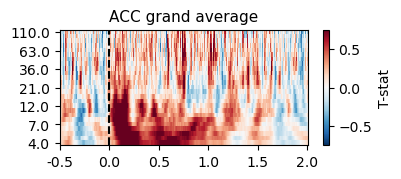

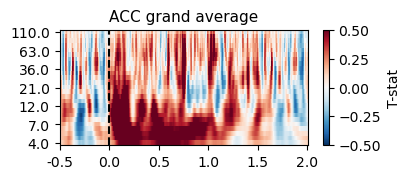

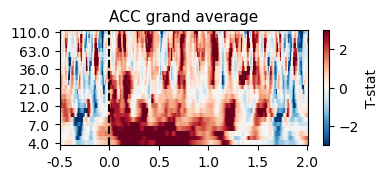

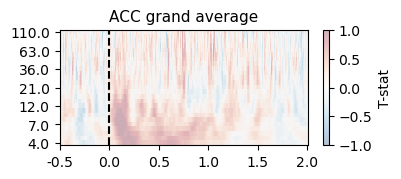

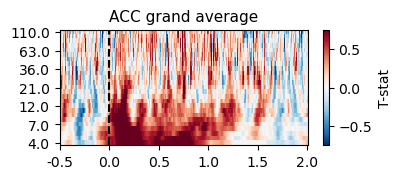

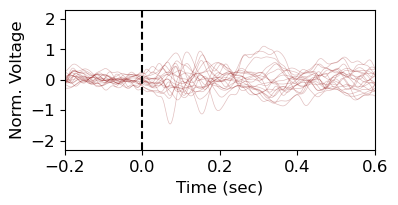

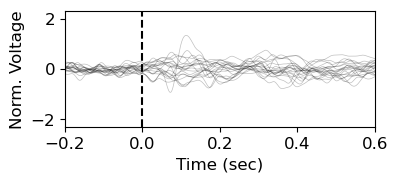

In [120]:
from scipy.stats import ttest_1samp
from scipy.ndimage import filters

# Plot results

recording_area = 'ACC'

# Plot TFR averaged across elecs
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
plt.matshow(np.mean(np.concatenate(t_elecs, axis=0), 0), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-0.75, vmax=0.75)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
plt.xticks(np.arange(0, 1251, 250), (np.arange(0, 1251, 250)/mytfr.fs)-0.5); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')
plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'Response_TFR.pdf')

# Plot TFR averaged across elecs, but with smoothing first
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
dat = np.concatenate(t_elecs, axis=0)
dat = np.array([filters.gaussian_filter(dat[i], [1.0, 3.0], mode='constant') for i in range(dat.shape[0])])
plt.matshow(np.mean(dat, axis=0), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-0.5, vmax=0.5)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
plt.xticks(np.arange(0, 1251, 250), (np.arange(0, 1251, 250)/mytfr.fs)-0.5); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')
plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'Response_TFR_smth.pdf')

# Plot statistical map (tested across subjects)
#t_map, p_map = ttest_1samp(np.concatenate(t_elecs, axis=0), 0, axis=0, nan_policy='omit')
t_map, p_map = ttest_1samp(np.array([filters.gaussian_filter(np.mean(t_, axis=0), [0.0, 5.0], mode='constant') for t_ in t_elecs]), 0, axis=0, nan_policy='omit')
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
plt.matshow(t_map, fignum=0, aspect='auto', cmap='RdBu_r', vmin=-3, vmax=3)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
plt.xticks(np.arange(0, 1251, 250), (np.arange(0, 1251, 250)/mytfr.fs)-0.5); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')
#plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'Response_TFR_tstat.pdf')

# Superimpose p-values on original power plot
from mne.stats import fdr_correction
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
plt.matshow(np.mean(np.concatenate(t_elecs, axis=0), 0)*fdr_correction(p_map, 0.05)[0], fignum=0, aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1)
plt.matshow(np.mean(np.concatenate(t_elecs, axis=0), 0), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1, alpha=0.3)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
plt.xticks(np.arange(0, 1251, 250), (np.arange(0, 1251, 250)/mytfr.fs)-0.5); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')

# Plot TFR averaged across electrodes and subjects
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
plt.matshow(np.mean(np.array([np.mean(t_, axis=0) for t_ in t_elecs]), axis=0),
            fignum=0, aspect='auto', cmap='RdBu_r', vmin=-0.75, vmax=0.75)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
plt.xticks(np.arange(0, 1251, 250), (np.arange(0, 1251, 250)/mytfr.fs)-0.5); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')

# Plot ERPs
plt.figure(figsize=(4, 4))
ax = plt.subplot(211)
X = (np.arange(sep_tms_mu.size)/mytfr.fs)-0.5
for idx, _ in enumerate(tms_erp):
    plt.plot(X, tms_erp[idx], color='darkred', linewidth=0.5, alpha=0.25)

# Highlight maximum electrode
#max_elec = np.unravel_index(np.argmax(np.array(tms_erp)), np.array(tms_erp).shape)
#plt.plot(X, tms_erp[max_elec[0]], color='red', linewidth=2)
plt.xlim(-0.2,0.6); 
plt.ylim(-2.3, 2.3);
plt.vlines([0.0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Norm. Voltage', fontsize=12);
plt.xlabel('Time (sec)', fontsize=12) 
plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'Response_ERPs.pdf')


# Identify significant ERPs to better visualize
# ax = plt.subplot(212)
# sig_erp = []
# for idx, _ in enumerate(tms_erp):   
#     # See if there's a t-value greater than 1 throughout the ERP timecourse
#     if (np.sum(np.abs(tms_erp[idx][250:275])>1)==0) & (np.sum(tms_erp[idx][275:325]<-0.5)>0):
#         plt.plot(X, tms_erp[idx], color='darkred', linewidth=0.5, alpha=0.6)
#         sig_erp.append(tms_erp[idx])
#     else:
#         continue
        
# sig_erp = np.array(sig_erp)
# plt.plot(X, np.mean(sig_erp, 0), color='red', linewidth=2)
# plt.xlim(-0.2,0.6); 
# plt.ylim(-2.3, 2.3);
# plt.vlines([0.0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
# plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Norm. Voltage', fontsize=12);
# plt.xlabel('Time (sec)', fontsize=12)         
# plt.tight_layout()

# Now plot sham results
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
for idx, _ in enumerate(sham_erp):
    plt.plot(X, sham_erp[idx], color='black', linewidth=0.5, alpha=0.25)
plt.xlim(-0.2,0.6); 
plt.ylim(-2.3, 2.3)
plt.vlines([0.0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Norm. Voltage', fontsize=12);
plt.xlabel('Time (sec)', fontsize=12)

**Average TFRs into 100ms epochs for statistical purposes**

C:\Users\esolo\AppData\Local\Temp\ipykernel_15400\2317557266.py:29: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  plt.matshow(filters.gaussian_filter(t_map, [0.0, 0.0], mode='constant'), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-5, vmax=5)


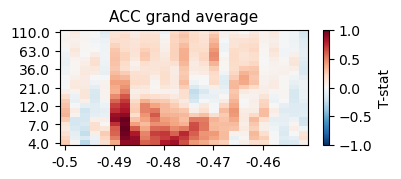

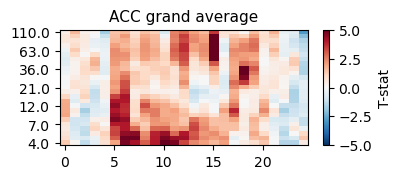

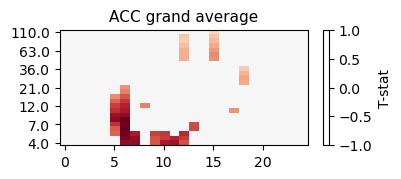

In [121]:
from scipy.ndimage import filters

def epoch_tfr(m, fs, winsize=0.1):
    '''
    Where m is a 3D array of elecs, frequencies, time. Winsize in seconds. Fs is sampling rate. 
    '''
    max_wins = int(m.shape[2]/(winsize*fs))
    m_rs = np.reshape(m[:, :, :int(max_wins*winsize*fs)], (m.shape[0], m.shape[1], max_wins, int(winsize*fs)))
    return m_rs

# Epoch the data
t_elecs_epoch = [np.mean(epoch_tfr(t_, fs=mytfr.fs), axis=-1) for t_ in t_elecs]

# Plot TFR averaged across elecs
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
plt.matshow(np.mean(np.concatenate(t_elecs_epoch, axis=0), 0), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
plt.xticks(np.arange(0, 25, 5), (np.arange(0, 25, 5)/mytfr.fs)-0.5); ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
#plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')

# Plot statistical map
t_map, p_map = ttest_1samp(np.concatenate(t_elecs_epoch, axis=0), 0, axis=0, nan_policy='omit')
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
plt.matshow(filters.gaussian_filter(t_map, [0.0, 0.0], mode='constant'), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-5, vmax=5)
#plt.matshow(t_map, fignum=0, aspect='auto', cmap='RdBu_r', vmin=-5, vmax=5)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
#plt.xticks(np.arange(0, 1251, 250), (np.arange(0, 1251, 250)/mytfr.fs)-0.5); 
ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
#plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')
#plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'Response_tstat_avg.pdf')

# Superimpose p-values on original power plot
from mne.stats import fdr_correction
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)
plt.matshow(np.mean(np.concatenate(t_elecs_epoch, axis=0), 0)*fdr_correction(p_map, 0.05)[0], fignum=0, aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1)
plt.matshow(np.mean(np.concatenate(t_elecs_epoch, axis=0), 0), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1, alpha=0.0)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
#plt.xticks(np.arange(0, 1251, 250), (np.arange(0, 1251, 250)/mytfr.fs)-0.5); 
ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
#plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title(recording_area+' grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')
#plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'Response_pvals.pdf')

#### Compute band-limited timecourses

Use a linear mixed-effects model for electrodes nested within subjects

In [122]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import sem

# Set some params
theta = np.arange(0, 6)
alpha = np.arange(6, 9)
gamma = np.arange(15, 19)
hfa = np.arange(21, 25)

# Data containers
theta_ts = []; theta_ps = []
gamma_ts = []; gamma_ps = []
hfa_ts = []; hfa_ps = []
theta_avg = []; theta_sem = []
gamma_avg = []; gamma_sem = []
hfa_avg = []; hfa_sem = []

# Loop through timepoints
for tp in range(0, t_elecs_epoch[0].shape[2]):
    
    # Create a DataFrame to store band-averaged powers
    df = pd.DataFrame()
    for sub, data in enumerate(t_elecs_epoch):
        for elec in range(0, data.shape[0]):
            
            theta_power = np.mean(data[elec, theta, tp], axis=0)
            gamma_power = np.mean(data[elec, gamma, tp], axis=0)
            hfa_power = np.mean(data[elec, hfa, tp], axis=0)
            df_row = {'subject':sub, 'elec':elec, 'theta':theta_power, 'gamma':gamma_power, 'hfa':hfa_power}
            df = df.append(df_row, ignore_index=True)
    
    # Theta power
    model_theta = sm.MixedLM.from_formula("theta ~ 1", data=df, groups='subject')
    result_theta = model_theta.fit(reml=True)
    theta_ts.append(result_theta.tvalues[0]); theta_ps.append(result_theta.pvalues[0])
    theta_avg.append(np.mean(df['theta'])); theta_sem.append(sem(df['theta']))

    # Gamma
    model_gamma = sm.MixedLM.from_formula("gamma ~ 1", data=df, groups='subject')
    result_gamma = model_gamma.fit(reml=True)
    gamma_ts.append(result_gamma.tvalues[0]); gamma_ps.append(result_gamma.pvalues[0])
    gamma_avg.append(np.mean(df['gamma'])); gamma_sem.append(sem(df['gamma']))
    
    # HFA
    model_hfa = sm.MixedLM.from_formula("hfa ~ 1", data=df, groups='subject')
    result_hfa = model_hfa.fit(reml=True)
    hfa_ts.append(result_hfa.tvalues[0]); hfa_ps.append(result_hfa.pvalues[0])    
    hfa_avg.append(np.mean(df['hfa'])); hfa_sem.append(sem(df['hfa']));

C:\Users\esolo\AppData\Local\Temp\ipykernel_15400\3534474293.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)
C:\Users\esolo\AppData\Local\Temp\ipykernel_15400\3534474293.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)
C:\Users\esolo\AppData\Local\Temp\ipykernel_15400\3534474293.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)
C:\Users\esolo\AppData\Local\Temp\ipykernel_15400\3534474293.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row, ignore_index=True)
C:\Users\esolo\AppDa

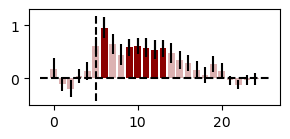

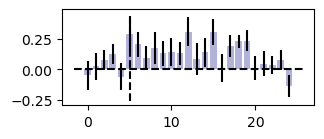

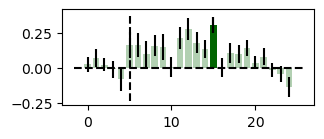

In [123]:
# Plot results -- tstats
# plt.figure(figsize=(3.5, 1.75)); ax=plt.subplot(111)
# plt.plot(theta_ts, '-', color='darkred', label='theta')
# plt.plot(gamma_ts, '-', color='darkblue', label='gamma')
# plt.plot(hfa_ts, '-', color='darkgreen', label='HFA')
# plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
# #plt.ylim(-6.5, 6.5); plt.xlim(0, 25)
# plt.tight_layout()

from mne.stats import fdr_correction

# Plot results -- average power (across electrodes)
plt.figure(figsize=(3.25, 1.25)); ax=plt.subplot(111)
plt.bar(np.arange(25), theta_avg, yerr=theta_sem, color='darkred', alpha=0.3)
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.bar(np.arange(6, 25), theta_avg[6:]*fdr_correction(theta_ps[6:], 0.05)[0], yerr=theta_sem[6:]*fdr_correction(theta_ps[6:], 0.05)[0], 
        color='darkred', label='theta')
#plt.ylim(-0.7, 0.7)
plt.vlines([5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='--', color='k')
plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'_theta_timecourses.pdf')

plt.figure(figsize=(3.25, 1.25)); ax=plt.subplot(111)
plt.bar(np.arange(25), gamma_avg, yerr=gamma_sem, color='darkblue', alpha=0.3)
plt.bar(np.arange(6, 25), gamma_avg[6:]*fdr_correction(gamma_ps[6:], 0.05)[0], yerr=gamma_sem[6:]*fdr_correction(gamma_ps[6:], 0.05)[0], 
        color='darkblue', label='gamma')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
#plt.ylim(-0.7, 0.7)
plt.vlines([5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='--', color='k')
plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'_gamma_timecourses.pdf')

plt.figure(figsize=(3.25, 1.25)); ax=plt.subplot(111)
plt.bar(np.arange(25), hfa_avg, yerr=hfa_sem, color='darkgreen', alpha=0.3)
plt.bar(np.arange(6, 25), hfa_avg[6:]*fdr_correction(hfa_ps[6:], 0.05)[0], yerr=hfa_sem[6:]*fdr_correction(hfa_ps[6:], 0.05)[0], 
        color='darkgreen', label='HFA')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
#plt.ylim(-0.7, 0.7)
plt.vlines([5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='--', color='k')
plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'_hfa_timecourses.pdf')


#plt.legend()
#plt.savefig('./multitaper_epo_plots/'+target+'stim_'+recording_area+'Band_timecourses.pdf')

# Run some statistics
from mne.stats import permutation_cluster_test

# F, clusters, cluster_pv, H0 = permutation_cluster_test([np.mean(t_, axis=0).reshape(1, t_.shape[1], t_.shape[2]) for t_ in t_elecs], 
#                                                        threshold=1, tail=1, out_type='mask', n_permutations=100)

F, clusters, cluster_pv, H0 = permutation_cluster_test(t_elecs_epoch, threshold=2, tail=0, out_type='mask', n_permutations=100, 
                                                      adjacency=None, step_down_p=0.05)

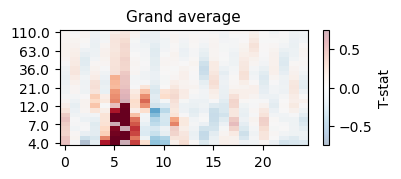

In [33]:
plt.figure(figsize=(4, 1.5))
ax = plt.subplot(111)

plt.matshow(np.mean(np.concatenate(t_elecs_epoch, axis=0), 0)*clusters[np.argsort(cluster_pv)[0]], fignum=0, aspect='auto', cmap='RdBu_r', vmin=-0.75, vmax=0.75)
plt.matshow(np.mean(np.concatenate(t_elecs_epoch, axis=0), 0), fignum=0, aspect='auto', cmap='RdBu_r', vmin=-0.75, vmax=0.75, alpha=0.3)
plt.yticks(np.arange(0, len(mytfr.freqs), 4), np.round(mytfr.freqs[::4]), fontsize=10)
#plt.xticks(ax.get_xticks(), np.round((ax.get_xticks()/mytfr.fs)-0.5, 3), fontsize=10); 
ax.xaxis.set_ticks_position('bottom')
ax.invert_yaxis()
#plt.vlines([0.5*mytfr.fs], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='black', linestyle='--', linewidth=1.5)
plt.title('Grand average', fontsize=11)
cbar = plt.colorbar(); cbar.set_label('T-stat')